## Name : Adwaiy Singh
## Reg. No. : 220968424
## Sec. : A
## Batch: 2

# Week 3
## Linear and MultiLinear and Logistic Regression

In [174]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [175]:
df = pd.read_csv("../data/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [176]:
print(df.shape)

(768, 9)


In [177]:
def removeOutliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3  = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df_low = Q1 - 1.5*IQR
    df_hi = Q3 + 1.5*IQR
    new_df = df[(df[col] < df_hi) & (df[col] > df_low)].reset_index(drop=True)
    return new_df

df = removeOutliers(df,'Pregnancies')
df = removeOutliers(df,'Age')

In [178]:
df.dropna()
print(df.shape)

(748, 9)


In [179]:
x = df[['Age']]
y = df[['Pregnancies']]

In [180]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [181]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(523, 1) (225, 1) (523, 1) (225, 1)


In [182]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [183]:
print(reg.coef_)
print(reg.intercept_)

[[0.18363818]]
[-2.23017544]


In [214]:
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_pred = reg.predict(x_range)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


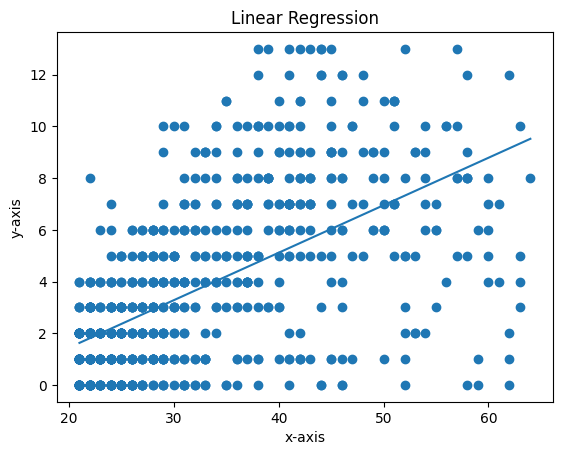

In [185]:
plt.scatter(x, y)
plt.plot(x_range, y_pred)

plt.title("Linear Regression")
plt.ylabel("y-axis")
plt.xlabel("x-axis")

plt.show()

In [186]:
y_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r = r2_score(y_test, y_pred)
print(mse)
print(r)

7.337259235838204
0.342738427212952


In [187]:
df['Pregnancies'].corr(df['Age'])

0.5897949202564391

In [188]:
df.shape

(748, 9)

In [189]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in columns:
    df = removeOutliers(df,col)

In [190]:
df.shape

(639, 9)

In [191]:
x1 = np.column_stack((df[['Glucose']], df[['BloodPressure']], df[['SkinThickness']], df[['Insulin']], df[['BMI']], df[['DiabetesPedigreeFunction']], df[['Age']]))
y1 = df[['Pregnancies']]

In [192]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=0)

In [193]:
print(x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape)

(447, 7) (192, 7) (447, 1) (192, 1)


In [194]:
reg1 = LinearRegression()
reg1.fit(x1_train, y1_train)

LinearRegression()

In [195]:
print(reg1.coef_)
print(reg1.intercept_)

[[ 0.00169039  0.00135796  0.01331819 -0.00272041 -0.01263771  0.05394888
   0.19283019]]
[-2.45678126]


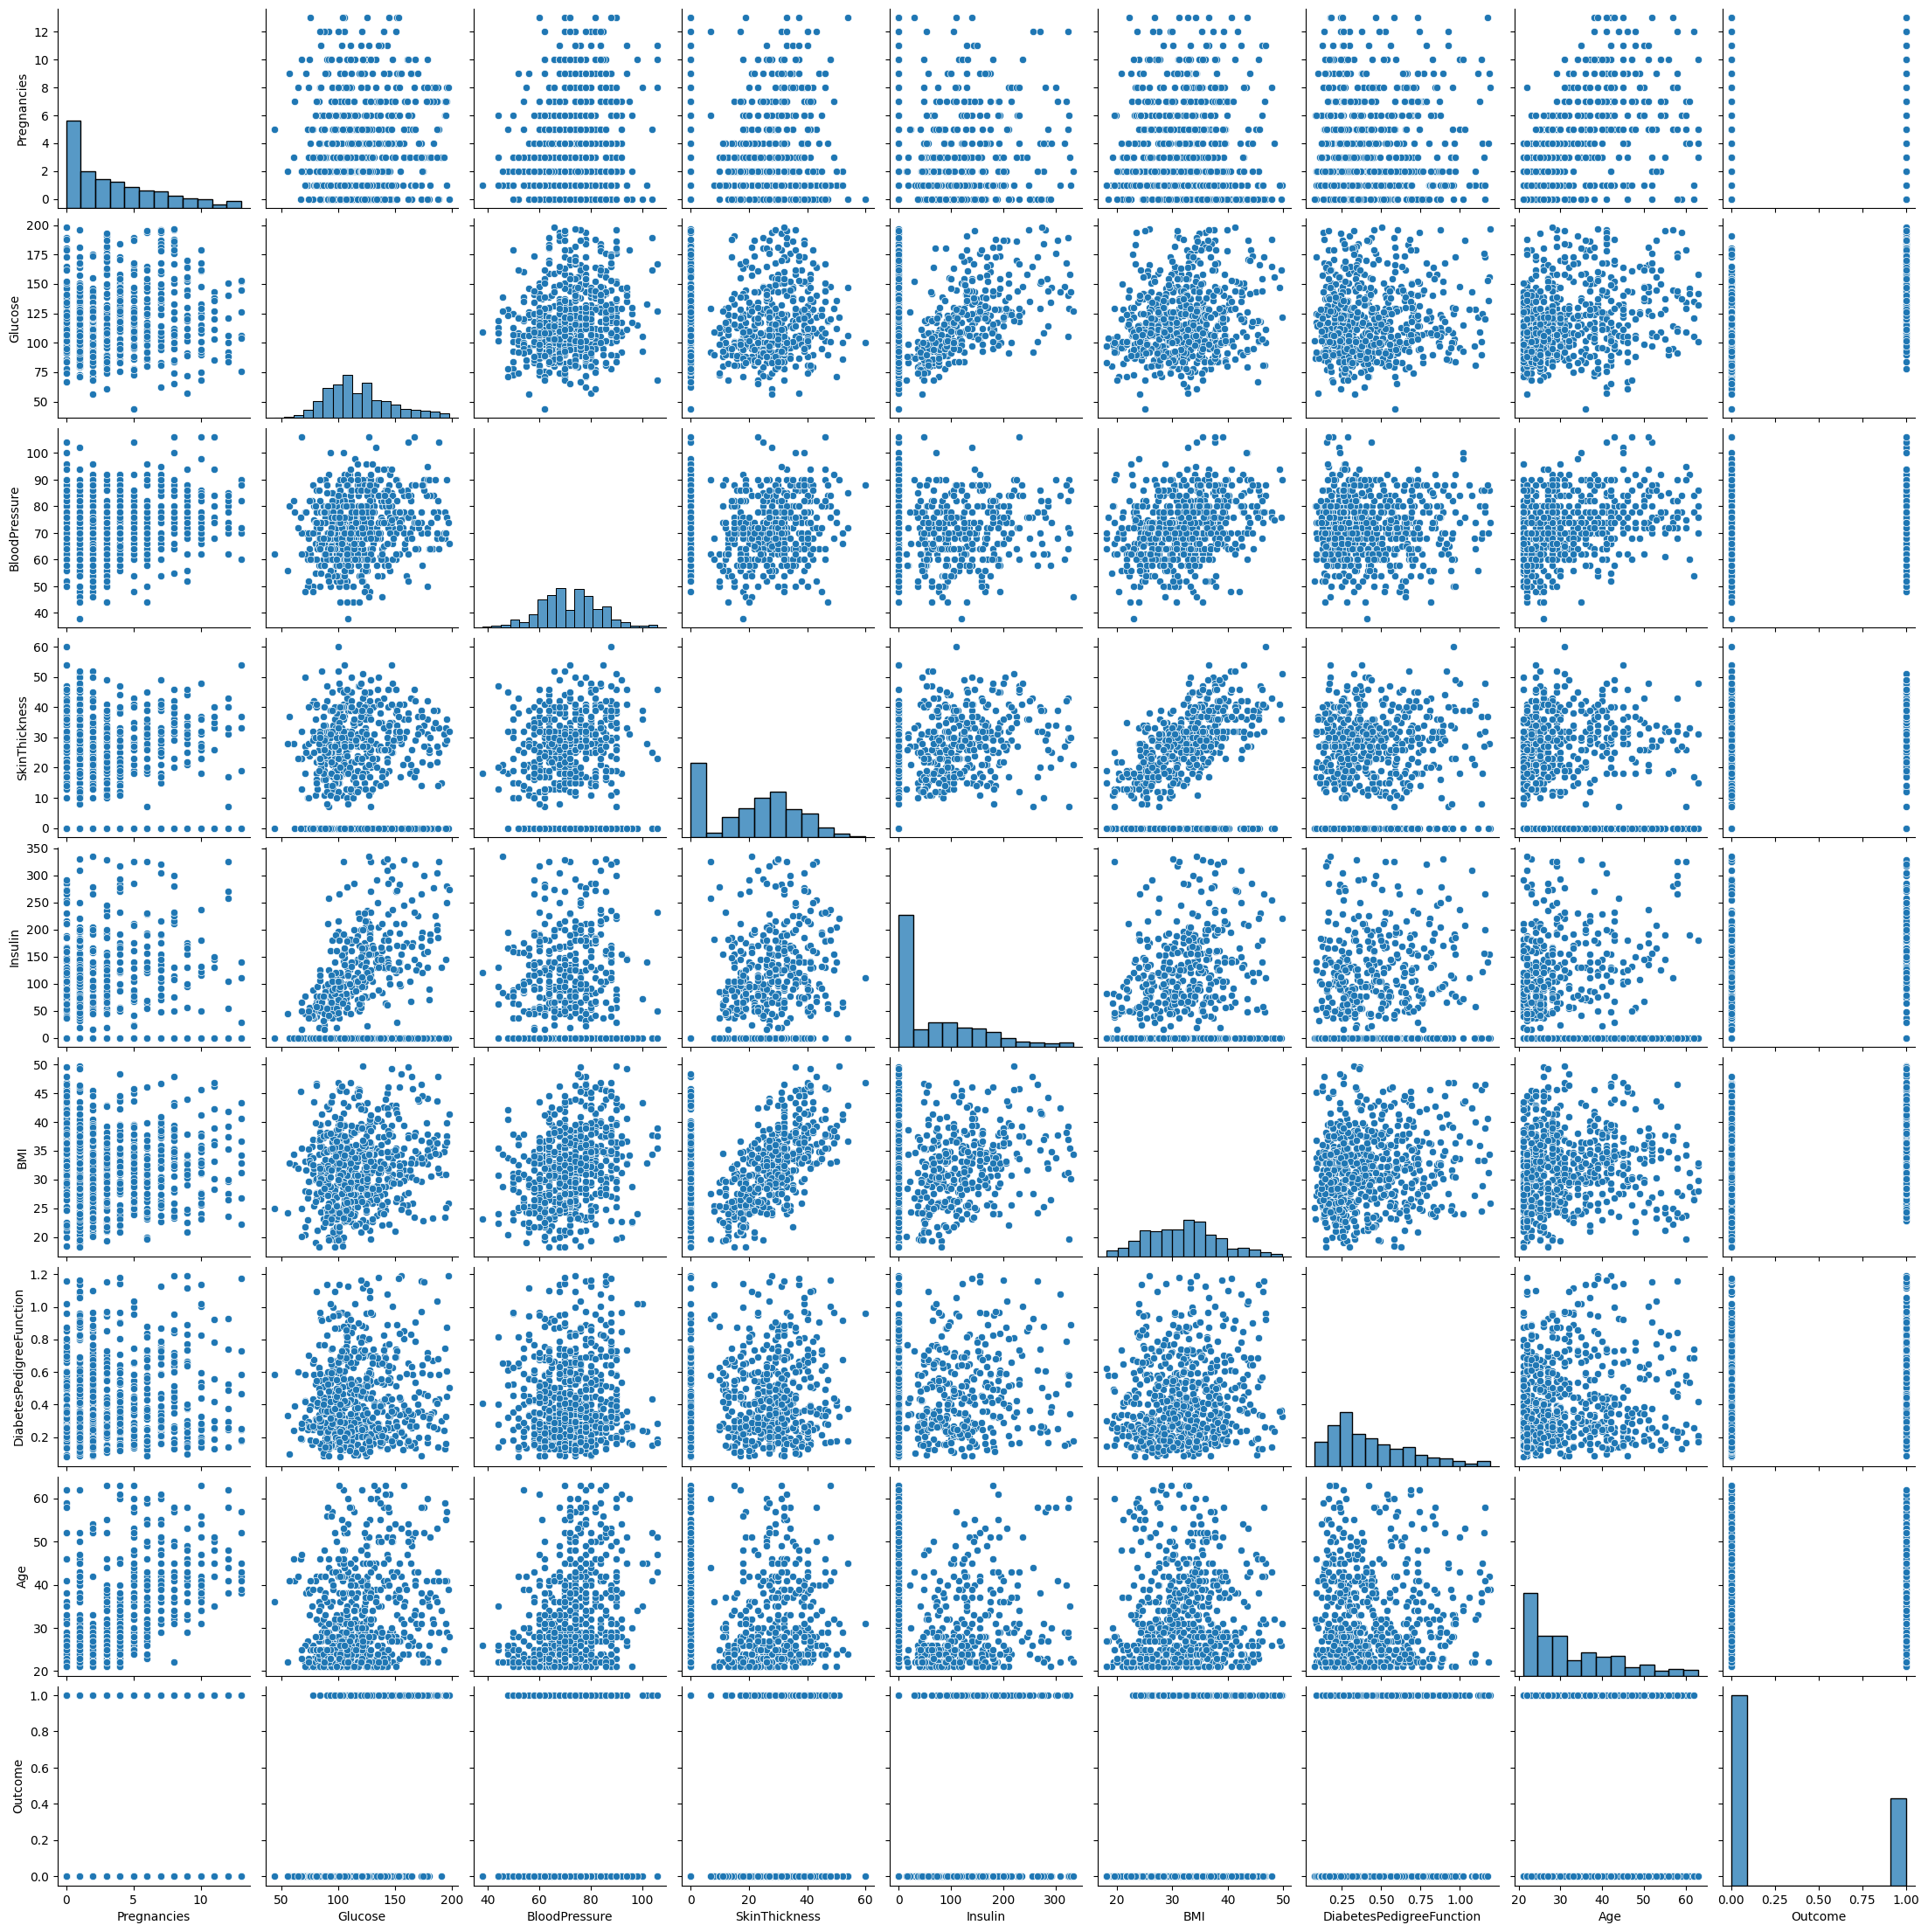

In [196]:
sns.pairplot(df)

In [197]:
y1_pred = reg1.predict(x1_test)

mse1 = mean_squared_error(y1_test, y1_pred)
r1 = r2_score(y1_test, y1_pred)
print(mse1)
print(r1)

7.6830622756596485
0.2570317625627807


In [198]:
df.shape

(639, 9)

In [199]:
df = removeOutliers(df,'Age')
df = removeOutliers(df,'Outcome')

In [200]:
df.dropna()
print(df.shape)

(639, 9)


In [201]:
x2 = df.drop(['Outcome'],axis=1)
y2 = df[['Outcome']]

In [202]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=0)

In [203]:
print(x2_train.shape, x2_test.shape, y2_train.shape, y2_test.shape)

(447, 8) (192, 8) (447, 1) (192, 1)


In [204]:
reg2 = LogisticRegression()
reg2.fit(x2_train, y2_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [210]:
w = reg2.coef_
print(w)
b = reg2.intercept_
print(b)

[[ 7.33518589e-02  4.34882521e-02 -1.39654764e-02  2.05899371e-03
  -5.79818198e-04  1.05279065e-01  1.16403767e+00  2.56531828e-02]]
[-10.18685929]


In [215]:
x2_range = np.linspace(x2.min(), x2.max(), 100).reshape(-1, 1)
z = np.dot(x2_range, w) + b
y2_pred = 1 / (1 + np.exp(-z))

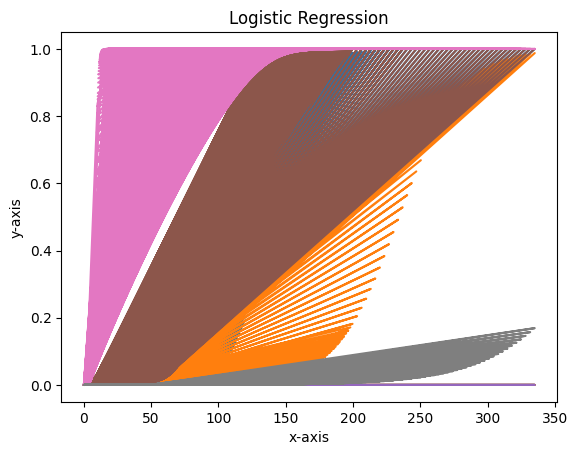

In [217]:
#plt.scatter(x2, y2)
plt.plot(x2_range, y2_pred)

plt.title("Logistic Regression")
plt.ylabel("y-axis")
plt.xlabel("x-axis")

plt.show()